<a href="https://colab.research.google.com/github/milowia/python_wagon/blob/main/ML_NonLinearRegression_Medical_Insurance_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

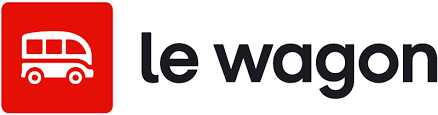

# Non-linear model

In the following challenge, we'll try to predict medical insurance charges based on certain factors!

While we're sure you find that premise interesting, the important part of this challenge is not the data, it's the modelling! We'll try to implement some **new** models that we haven't seen before.

Remember one thing: the goal of this challenge is not to give you an understanding of the mathematical intricacies of these models - that's the job of a data scientist. However, we want to show you just how easy these models are to code and how friendly the SKLearn Library is!

## Import the data

Go to [this](https://www.kaggle.com/datasets/mirichoi0218/insurance) link and download the medical insurance charges dataset. Load it into a dataframe!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Le Wagon - DA/Feb 11 - Machine Learning LinearRegression/insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Preprocessing

Before doing any preprocessing let's build our baseline.

### Split into X and y

Choose the appropriate columns to assign to the X and y variables!

In [ ]:
X = df.drop(columns=['charges'])
y = df['charges']

### Train-test split

Split your data now, into train and test variables (80/20)!

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 90.8+ KB


### Baseline

Here take only the numerical features and use a Linear Regression.

Think about the metric we need to use to evaluate our models.

<details>
<summary>Hint 1:</summary>

We are in a regression problem.
</details>
<details>
<summary>Hint 2:</summary>

You can look on scikit learn [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html).</details>

In [ ]:
X_num = df.drop(columns=['sex', 'smoker', 'region', 'charges'])
y_num = df['charges']

X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num, y_num, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num_train_scaled = scaler.fit_transform(X_num_train)
X_num_test_scaled = scaler.transform(X_num_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model_num = LinearRegression()
model_num.fit(X_num_train_scaled, y_num_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error
y_num_train_predict = model_num.predict(X_num_train_scaled)
mean_absolute_error(y_num_train, y_num_train_predict)

9005.903239206273

Now our baseline is build let's do our preprocessing and see if we can decrease the model error.

### Scaling

Like in the previous exercise, we'll have to scale the numerical **and** non-numerical columns!

### Numerical values

Scale the numerical values - remember from the last challenge what we did to select only the relevant columns.

<details>
    <summary><i>Hint:</i></summary>
You have to fit it on the train and not on the test.
</details>

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_train_scaled = scaler.fit_transform(X_train[['age', 'bmi', 'children']])
num_test_scaled = scaler.transform(X_test[['age', 'bmi', 'children']])
df_num_train_scaled = pd.DataFrame(num_train_scaled, columns=scaler.get_feature_names_out())
df_num_test_scaled = pd.DataFrame(num_test_scaled, columns=scaler.get_feature_names_out())


In [ ]:
df_num_train_scaled.reset_index()
df_num_test_scaled.reset_index()

,index,age,bmi,children
0,0,0.401140,-0.891539,0.734336
1,1,-0.238638,-0.089461,-0.911192
2,2,1.751782,-0.608453,-0.911192
3,3,0.472227,-0.797177,1.557100
4,4,-1.447107,0.225079,-0.911192
...,...,...,...,...
263,263,1.680696,0.749865,-0.911192
264,264,1.325264,-0.561272,-0.911192
265,265,-0.096465,-0.419729,-0.088428
266,266,1.040918,2.789410,-0.911192


### Non-numerical values

Now it's time to scale the non-numerical values as well. Use `pd.get_dummies`!
Save each into 'X_train_cat' and 'X_test_cat'.

In [ ]:
X_train_cat = pd.get_dummies(X_train[['sex', 'smoker', 'region']], dtype='float').reset_index()

In [ ]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1070 non-null   int64  
 1   sex_female        1070 non-null   float64
 2   sex_male          1070 non-null   float64
 3   smoker_no         1070 non-null   float64
 4   smoker_yes        1070 non-null   float64
 5   region_northeast  1070 non-null   float64
 6   region_northwest  1070 non-null   float64
 7   region_southeast  1070 non-null   float64
 8   region_southwest  1070 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 75.4 KB


What is the number of columns of each 'X_train_cat' and 'X_test_cat'?
<details>
 <summary><i>Answer:</i></summary>
 You are suppose to have 8 columns.
</details>

In [ ]:
X_test_cat = pd.get_dummies(X_test[['sex', 'smoker', 'region']], dtype='float').reset_index()

### Rebuild X!

Concat your numerical and non-numerical Xs into one! Store it in 'X_train_preproc' and 'X_test_preproc'

Check if you have nan in your dataframes.
<details>
    <summary>Hint:</summary>
If you have nan in it is because of the way `pd.get_dummies` works. It is not reset the index of your dataframe and so you have different index for the concatenation.
<details>
<summary>Answer:</summary>
You have to use `pd.reset_index` on your categorical dataframes.
</details>
</details>

In [ ]:
X_train_preproc = df_num_train_scaled.join(X_train_cat, how='inner')
X_test_preproc = df_num_test_scaled.join(X_test_cat, how='inner')
X_test_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               268 non-null    float64
 1   bmi               268 non-null    float64
 2   children          268 non-null    float64
 3   index             268 non-null    int64  
 4   sex_female        268 non-null    float64
 5   sex_male          268 non-null    float64
 6   smoker_no         268 non-null    float64
 7   smoker_yes        268 non-null    float64
 8   region_northeast  268 non-null    float64
 9   region_northwest  268 non-null    float64
 10  region_southeast  268 non-null    float64
 11  region_southwest  268 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 25.3 KB


In [ ]:
X_train_preproc.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.472227,-1.756525,0.734336,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.543313,-1.033082,-0.911192,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.898745,-0.943687,-0.911192,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.025379,0.622393,3.202629,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.040918,-1.504893,1.557100,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


## Modelling!

It's time to do some modelling, only this time, we're going beyond Linear Regressions!

### Linear Regression

Perform a Linear Regression on the data!

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_preproc, y_train)

LinearRegression()

Now, calculate the MAE of your Linear Regression!

In [ ]:
from sklearn.metrics import mean_absolute_error
y_train_predict = model.predict(X_train_preproc)
mean_absolute_error(y_train, y_train_predict)

4202.643629197808

We divide our error by more than 2. As you can see the preprocessing is really important if you want modelling.

Be sure everything before is **understanding** before start the optional.

# Optional

Choosing the appropriate model can also reduce errors. There are various types of models available for regression let's try a few!

### Trees - Random Forest Regression

Now we're getting a bit more complex! Look up the sklearn documentation for the `RandomForestRegressor` and see how you could implement it for our dataset!

Don't spend too much time trying to understand how this model works under the hood, that's not the purpose here. However, if you're curious, watch [this short video](https://www.youtube.com/watch?v=gkXX4h3qYm4) from IBM that explains the basics.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train_preproc, y_train)

RandomForestRegressor()

Now it's time to calculate the MAE of the Random Forest model.

In [ ]:
y_train_predict = rfr.predict(X_train_preproc)
MAE = mean_absolute_error(y_train_predict, y_train)
MAE

1022.7985804385988

### Support Vector Machine

Same drill as last time, only now we're trying the `Support Vector Regressor`. Again, look up the documentation of this model and implement it below.

[Here's](https://www.youtube.com/watch?v=_YPScrckx28) a very short video that explains the idea behind SVM's. Don't dwell too much on trying to understand how it works, only the basics!

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_preproc, y_train)
y_train_predict_svr = svr.predict(X_train_preproc)
MAE_svr = mean_absolute_error(y_train_predict_svr, y_train)
MAE_svr

8280.719889083433

Let's calculate the MAE now!

In [ ]:
# your code here

### Your own model

Look through the SKLearn documentation to find another regression model and try your best to implement it. How does it perform?

In [ ]:
# your code here

Calculate the error of your model!

In [ ]:
#your code here

## Conclusions

The results are in! The model that perfomed best was the random forest, followed by the linear regression and trailing in last place, the SVR! This goes to show that the most complex models are not always the best!

How did your model do?

**A little caveat:** this was a very simplistic implementation of what are complex models. In a more realistic scenario, a data scientist would have spent a considerable portion of their time on finetuning these models to improve their performance. In this challenge, the purpose was not to do that, but rather to show how easy the Sci-Kit Learn Library is to use!